In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
data = pd.read_csv('홍게.csv')
data['ds'] = pd.to_datetime(data['기간'])  # 'ds' 컬럼을 날짜 형식으로 변환
data.rename(columns={'단가': 'y'}, inplace=True)  # 종속 변수 컬럼 이름을 'y'로 변경

In [3]:
model1 = Prophet(seasonality_prior_scale=1)
model1.fit(data)

23:55:48 - cmdstanpy - INFO - Chain [1] start processing
23:55:48 - cmdstanpy - INFO - Chain [1] done processing


In [4]:
future = model1.make_future_dataframe(periods=12, freq='M')  # 향후 12개월의 날짜 생성
forecast = model1.predict(future)

In [5]:
forecast['yhat'] = forecast['yhat'].apply(lambda x: max(0, x))

In [6]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
25,2023-02-28,9921.723909,7299.111211,12454.343756
26,2023-03-31,7625.804267,4893.319767,10192.973329
27,2023-04-30,6884.457957,4156.884334,9498.007428
28,2023-05-31,11501.928349,8783.931154,14240.202292
29,2023-06-30,5787.990214,3242.013769,8462.067881
30,2023-07-31,5269.885937,2786.593711,7977.616519
31,2023-08-31,9192.797891,6383.955016,11953.379664
32,2023-09-30,9195.373800,6491.372088,11726.814578
33,2023-10-31,10787.196186,8001.648962,13516.966659
34,2023-11-30,12030.241561,9237.392863,14605.554092


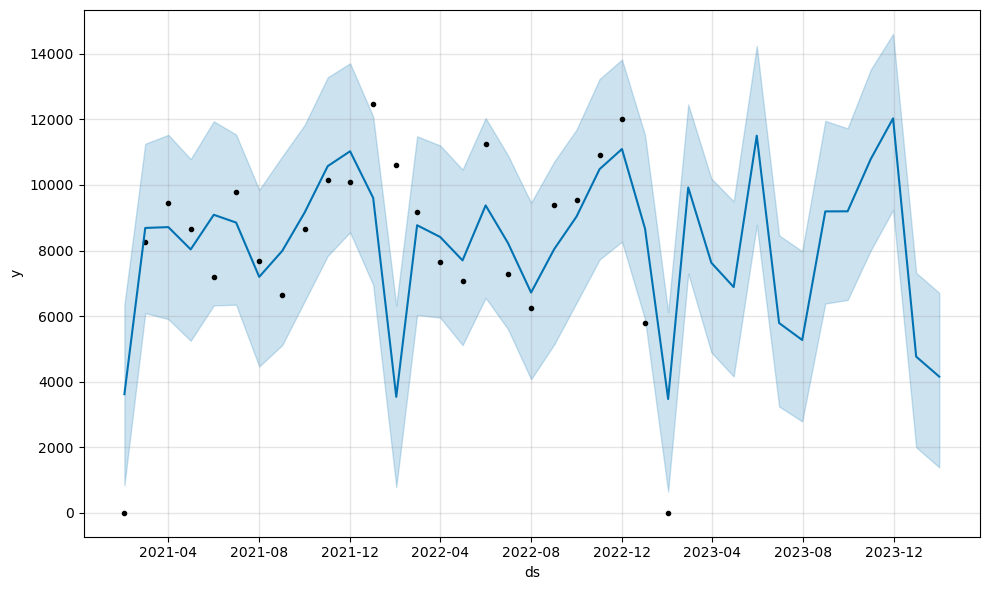

In [7]:
fig1 = model1.plot(forecast)

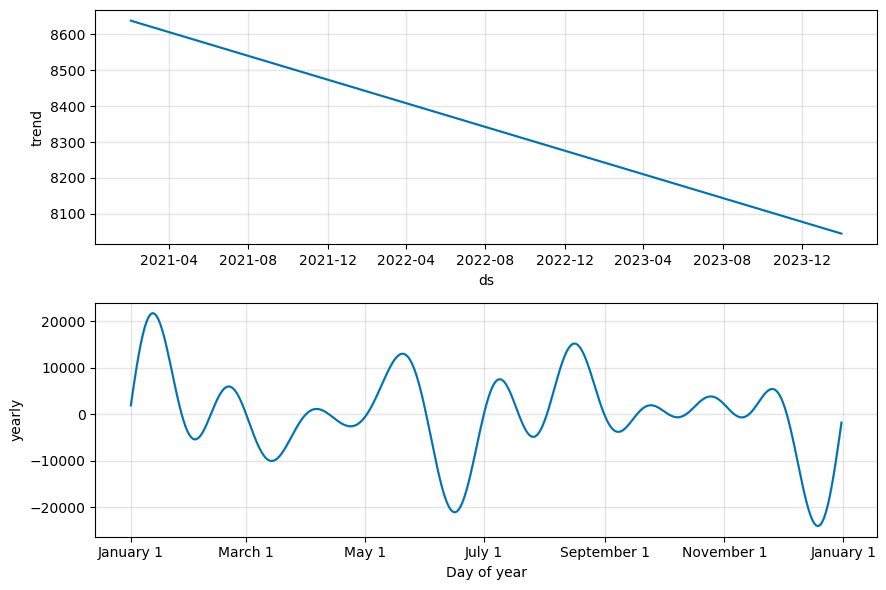

In [8]:
fig2 = model1.plot_components(forecast)

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [9]:
data = pd.read_csv('홍게.csv')

In [10]:
quantity = data['물량-평균'].values
price = data['단가'].values

In [11]:
model = LinearRegression()
model.fit(quantity.reshape(-1, 1), price)

LinearRegression()

In [12]:
print("물량과 가격 분석 결과:")
print("기울기 (회귀 계수):", model.coef_[0])
print("절편 (절편 값):", model.intercept_)

물량과 가격 분석 결과:
기울기 (회귀 계수): 24.443197572786264
절편 (절편 값): 4830.818258353595
